In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle.json" with length 68 bytes


In [0]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!kaggle datasets download -d uciml/mushroom-classification

mushroom-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
from zipfile import ZipFile
file_name="mushroom-classification.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


**Mushroom Classification**

Importing some libraries

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
mushroom=pd.read_csv('mushrooms.csv')

In [0]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
Cap: The cap is the top of the mushroom (and often looks sort of like a small umbrella). Mushroom caps can come in a variety of colors but most often are brown, white, or yellow.

Gills, Pores, or Teeth: These structures appear under the mushroom's cap. They look similar to a fish's gills.

Ring: The ring (sometimes called the annulus) is the remaining structure of the partial veil after the gills have pushed through.

Stem or Stipe: The stem is the tall structure that holds the cap high above the ground.

Volva: The volva is the protective veil that remains after the mushroom sprouted up from the ground. As the fungus grows, it breaks through the volva.

Spores: Microscopic seeds acting as reproductive agents; they are usually released into the air and fall on a substrate to produce a new mushroom.

In [0]:
mushroom.shape

(8124, 23)

In [0]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [0]:
mushroom.isnull().sum()

Data Visualization

In [0]:
print(mushroom.groupby('class').size())

class
e    4208
p    3916
dtype: int64


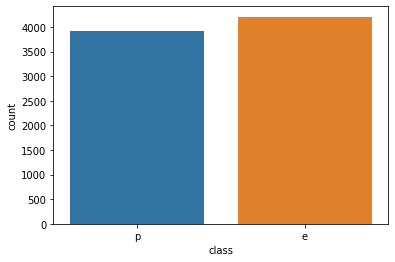

In [0]:
sns.countplot(x='class',data=mushroom)

[Text(0, 0, 'brown'),
 Text(0, 0, 'gray'),
 Text(0, 0, 'red'),
 Text(0, 0, 'yellow'),
 Text(0, 0, 'blue'),
 Text(0, 0, 'buff'),
 Text(0, 0, 'pink'),
 Text(0, 0, 'cinnamon'),
 Text(0, 0, 'purple'),
 Text(0, 0, 'green')]

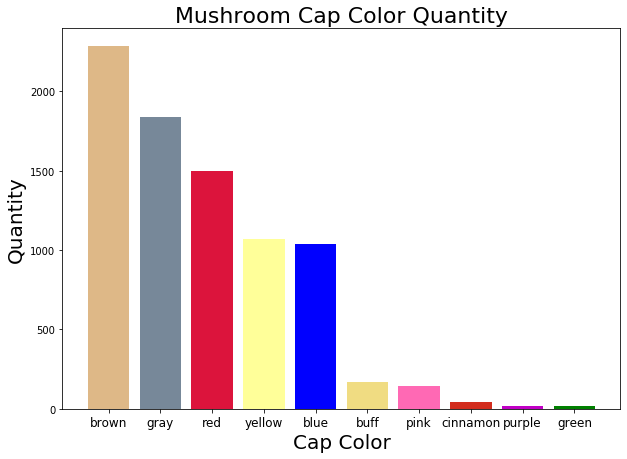

In [0]:
cap_colors = mushroom['cap-color'].value_counts()
ind = np.arange(10)
m_height = cap_colors.values.tolist()
colors = ['#DEB887','#778899','#DC143C','#FFFF99','blue','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind,m_height, color=colors)
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) 
ax.set_xticklabels(('brown', 'gray','red','yellow','blue','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

[Text(0, 0, 'brown'),
 Text(0, 0, 'gray'),
 Text(0, 0, 'red'),
 Text(0, 0, 'yellow'),
 Text(0, 0, 'blue'),
 Text(0, 0, 'buff'),
 Text(0, 0, 'pink'),
 Text(0, 0, 'cinnamon'),
 Text(0, 0, 'purple'),
 Text(0, 0, 'green')]

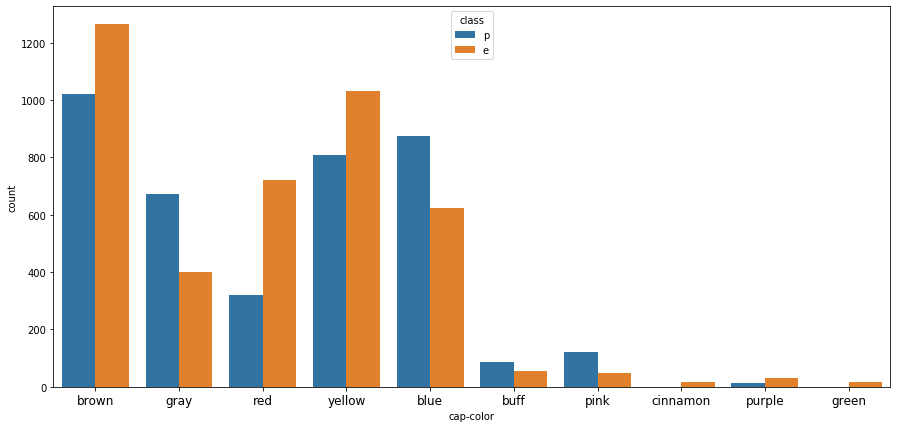

In [0]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
fig, ax = plt.subplots(figsize=(15, 7))
            
sns.countplot(x='cap-color',hue='class',data=mushroom)
ax.set_xticklabels(('brown', 'gray','red','yellow','blue','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

[Text(0, 0, 'convex'),
 Text(0, 0, 'bell'),
 Text(0, 0, 'sunken'),
 Text(0, 0, 'flat'),
 Text(0, 0, 'knobbed'),
 Text(0, 0, 'conical')]

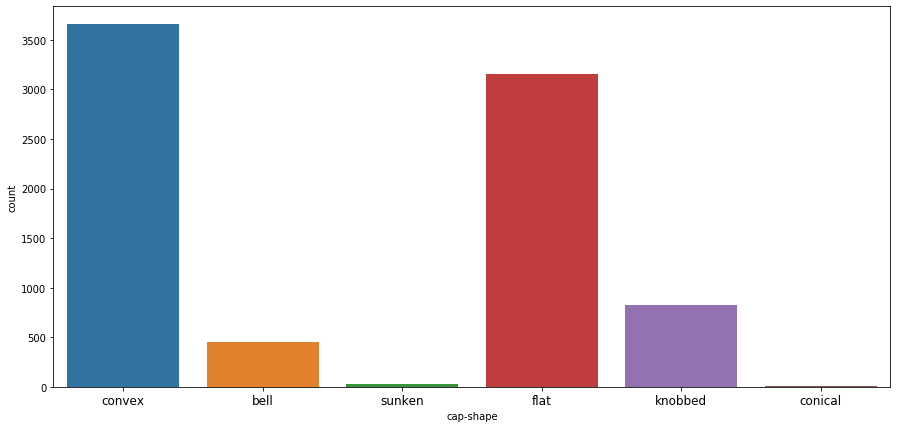

In [0]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x='cap-shape',label='labels',data=mushroom)
ax.set_xticklabels(('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical'),
                  fontsize = 12)

[Text(0, 0, 'convex'),
 Text(0, 0, 'bell'),
 Text(0, 0, 'sunken'),
 Text(0, 0, 'flat'),
 Text(0, 0, 'knobbed'),
 Text(0, 0, 'conical')]

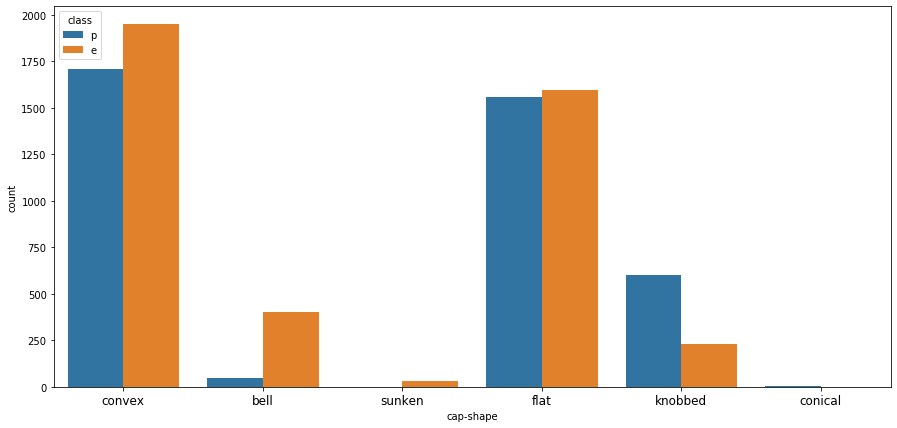

In [0]:
fig, ax = plt.subplots(figsize=(15, 7))
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
sns.countplot(x='cap-shape',hue='class',data=mushroom)
ax.set_xticklabels(('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical'),
                  fontsize = 12)

[Text(0, 0, 'pungent'),
 Text(0, 0, 'almond'),
 Text(0, 0, 'anise'),
 Text(0, 0, 'none'),
 Text(0, 0, 'foul'),
 Text(0, 0, 'creosote'),
 Text(0, 0, 'fishy'),
 Text(0, 0, 'spicy'),
 Text(0, 0, 'musty')]

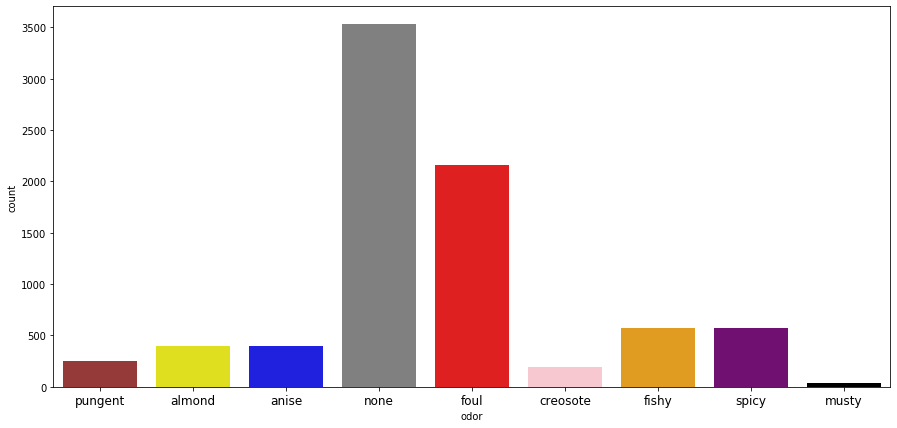

In [0]:
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y",
             "foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
colors=color_dict.keys()
labels=odor_dict.keys()
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x='odor',palette=colors,data=mushroom)
ax.set_xticklabels(('pungent', 'almond', 'anise', 'none', 'foul', 'creosote','fishy',"spicy","musty"),
                  fontsize = 12)

[Text(0, 0, 'pungent'),
 Text(0, 0, 'almond'),
 Text(0, 0, 'anise'),
 Text(0, 0, 'none'),
 Text(0, 0, 'foul'),
 Text(0, 0, 'creosote'),
 Text(0, 0, 'fishy'),
 Text(0, 0, 'spicy'),
 Text(0, 0, 'musty')]

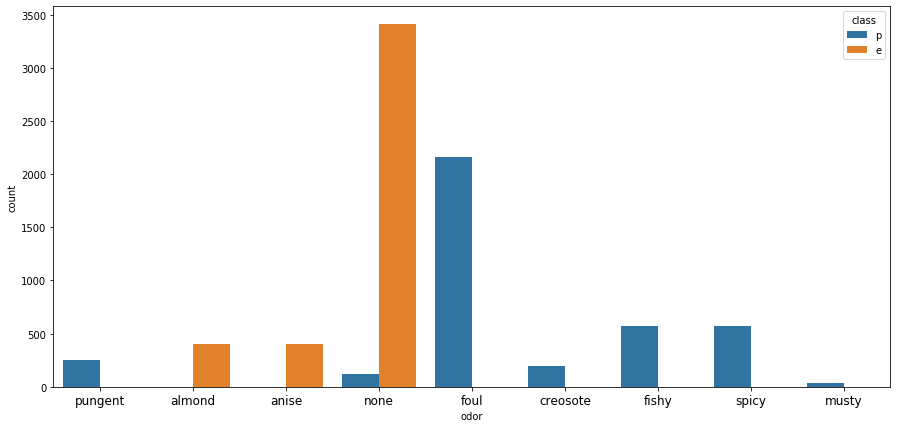

In [0]:

fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x='odor',hue='class',data=mushroom)
ax.set_xticklabels(('pungent', 'almond', 'anise', 'none', 'foul', 'creosote','fishy',"spicy","musty"),
                  fontsize = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


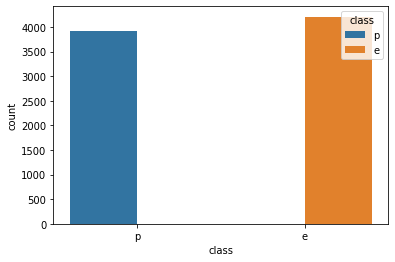

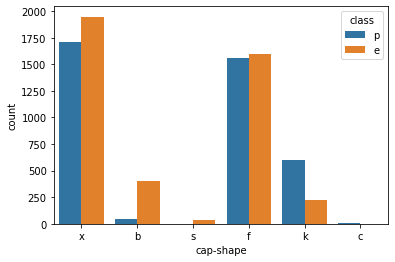

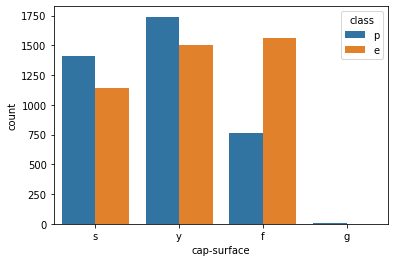

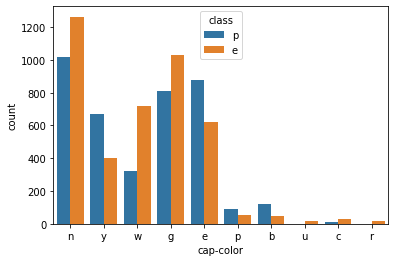

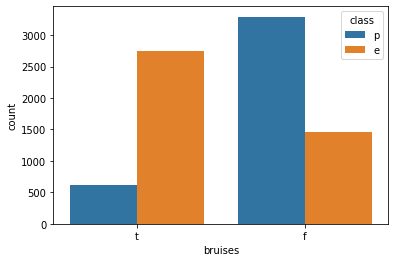

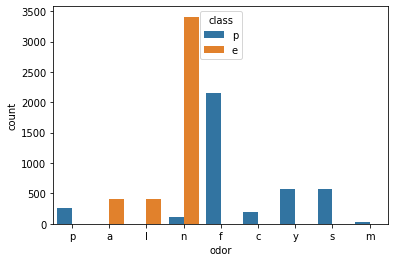

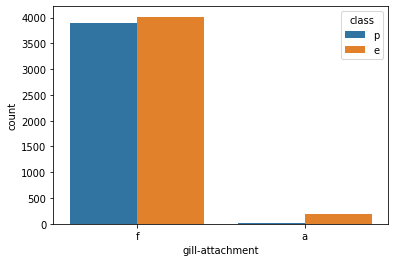

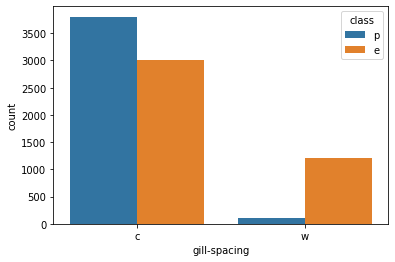

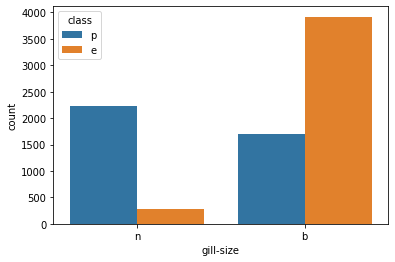

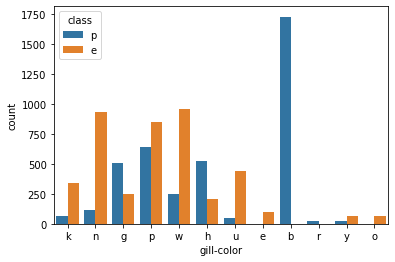

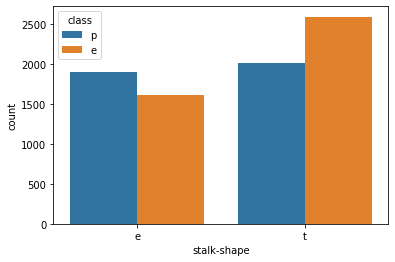

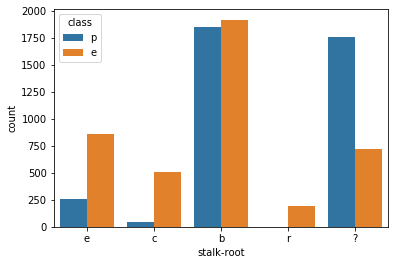

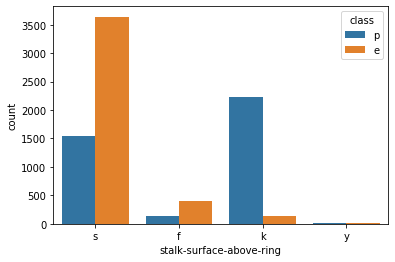

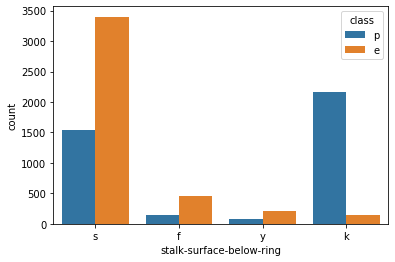

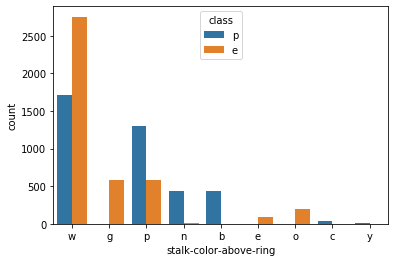

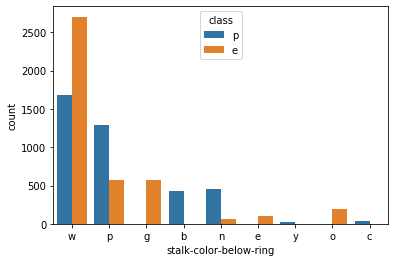

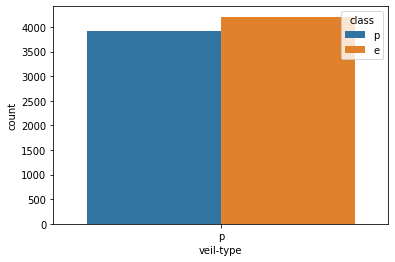

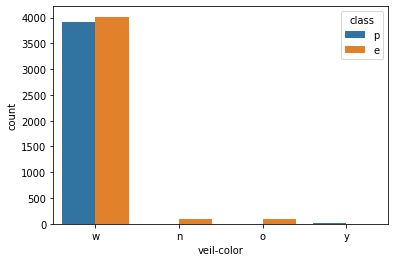

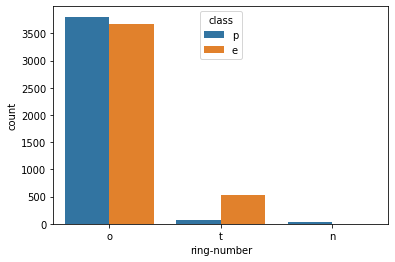

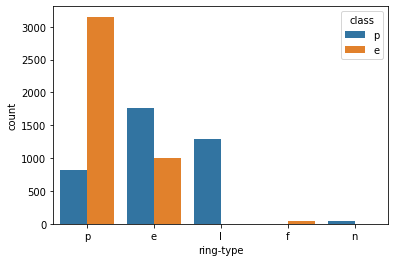

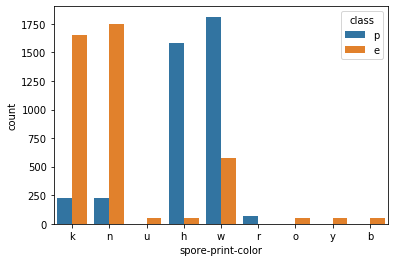

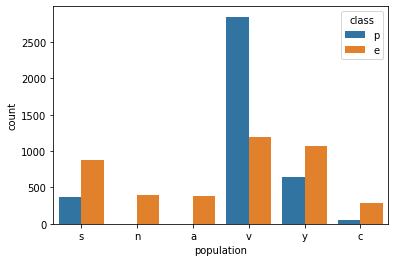

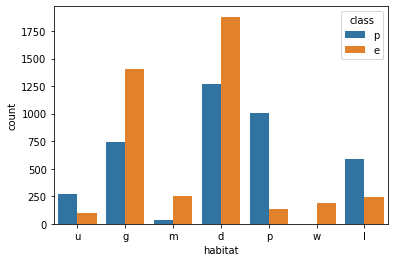

In [0]:
hue1=mushroom['class']
for i,col in enumerate(mushroom.columns):
  plt.figure(i)
  sns.countplot(x=col,hue=hue1,data=mushroom)

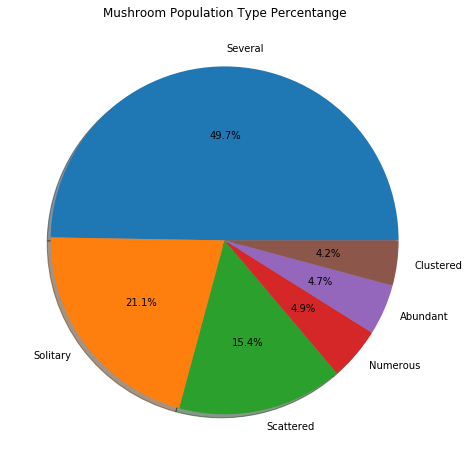

In [0]:
plt.figure(figsize=(8,8))
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
labels=list(mushroom['population'].unique())
plt.pie(mushroom['population'].value_counts(),labels=pop_labels,autopct='%1.1f%%', 
        shadow=True)
plt.title('Mushroom Population Type Percentange')
plt.show()

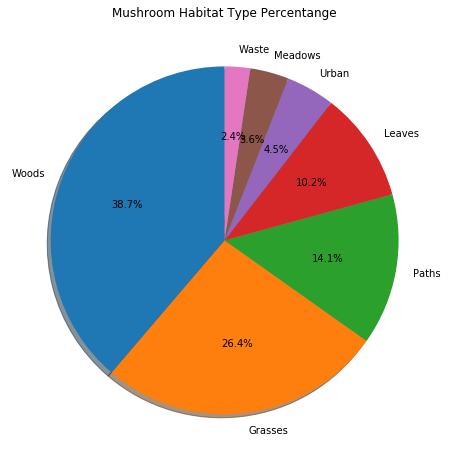

In [0]:
plt.figure(figsize=(8,8))
hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
labels1=list(mushroom['habitat'].unique())
plt.pie(mushroom['habitat'].value_counts(),labels=hab_labels,autopct='%1.1f%%', 
        shadow=True, startangle=90)
plt.title('Mushroom Habitat Type Percentange')
plt.show()

Data Preprocessing

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in mushroom.columns:
    mushroom[column]=labelencoder.fit_transform(mushroom[column])
    
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
x=mushroom[mushroom.columns]
x=x.drop(columns=['class'])
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
y=mushroom['class']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler
stand_x=StandardScaler()
x=stand_x.fit_transform(x)
x[0]

array([ 1.02971224,  0.14012794, -0.19824983,  1.18591657,  0.88193766,
        0.16289645, -0.43886364,  1.49468272, -0.22899776, -1.14480575,
        1.78146019,  0.68377765,  0.58638466,  0.62244139,  0.63199138,
        0.        ,  0.14203663, -0.25613174,  0.94808086, -0.67019486,
       -0.5143892 ,  2.03002809])

Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

LogisticRegression Model

In [0]:
from sklearn import linear_model
mod1=linear_model.LogisticRegression(multi_class='auto')

mod1.fit(x_train,y_train)

train_accuracy1=mod1.score(x_train,y_train)
print('train accuracy\t:',train_accuracy1)
test_accuracy1=mod1.score(x_test,y_test)
print('test accurracy\t:',test_accuracy1)

train accuracy	: 0.95707031851054
test accurracy	: 0.9556923076923077


Confusion Matrix And Classification Report

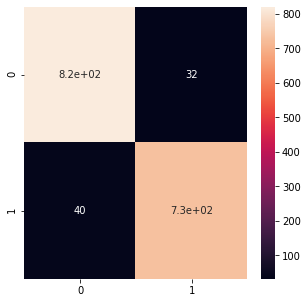

In [0]:
y_pred1=mod1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(5,5))
sns.heatmap(cm1,annot=True)

In [0]:
from sklearn.metrics import classification_report
target=['edible','poisonous']
print(classification_report(y_test,y_pred1,target_names=target))

              precision    recall  f1-score   support

      edible       0.95      0.96      0.96       852
   poisonous       0.96      0.95      0.95       773

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



Receiver Operating Characteristic

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_test, y_pred1)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
roc_auc1

0.9553474360609538

Text(0.5, 0, 'False Positive Rate')

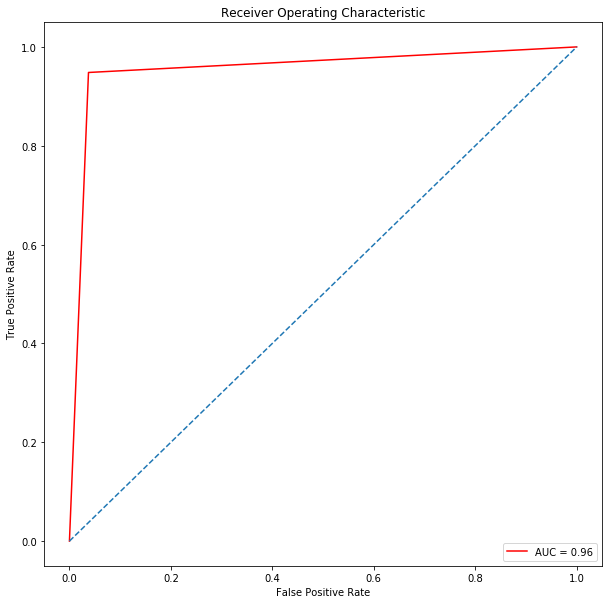

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1,true_positive_rate1, color='red',label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

DecisionTreeClassifier Model

In [0]:
from sklearn.tree import DecisionTreeClassifier

mod2=DecisionTreeClassifier(min_samples_leaf=15)

mod2.fit(x_train,y_train)


#model prediction
train_accuracy2=mod2.score(x_train,y_train)
print('train accuracy\t:',train_accuracy2)
test_accuracy2=mod2.score(x_test,y_test)
print('test accurracy\t:',test_accuracy2)

train accuracy	: 0.99523003539006
test accurracy	: 0.9969230769230769


Confusion Matrix And Classification Report

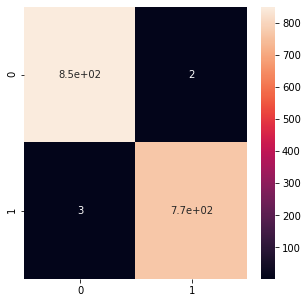

In [0]:
y_pred2=mod2.predict(x_test)
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(5,5))
sns.heatmap(cm2,annot=True)

In [0]:
from sklearn.metrics import classification_report
target=['edible','poisonous']
print(classification_report(y_test,y_pred2,target_names=target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       852
   poisonous       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Receiver Operating Characteristic

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test, y_pred2)
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc2

0.9968857994886091

Text(0.5, 0, 'False Positive Rate')

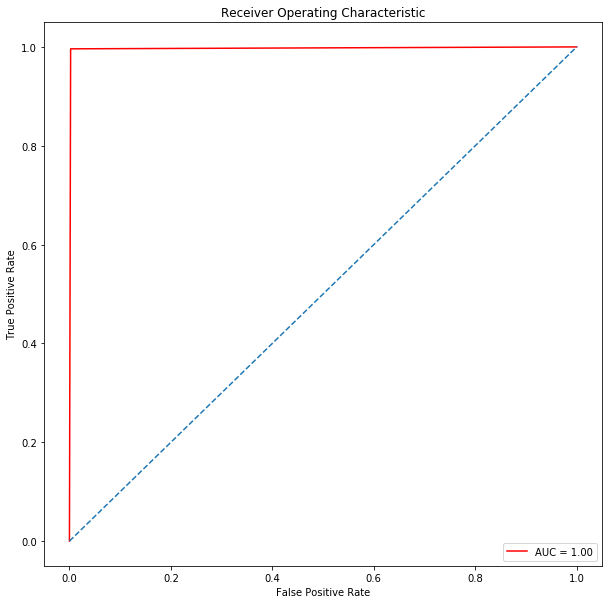

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate2,true_positive_rate2, color='red',label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

RandomForestClassifier Model

In [0]:
from sklearn.ensemble import RandomForestClassifier


mod3=RandomForestClassifier(n_estimators=50,min_samples_leaf=20)

mod3.fit(x_train,y_train)
#model evaluation
train_accuracy3=mod3.score(x_train, y_train)
test_accuracy3=mod3.score(x_test, y_test)
#model prediction
print("train_accuracy:",train_accuracy3)
print("test_accuracy:",test_accuracy3)

train_accuracy: 0.9993845206954917
test_accuracy: 1.0


Confusion Matrix And Classification Report

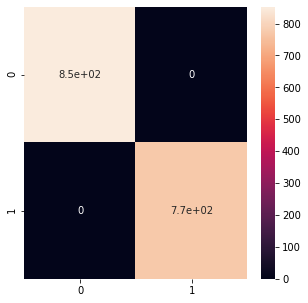

In [0]:
y_pred3=mod3.predict(x_test)
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(5,5))
sns.heatmap(cm3,annot=True)

In [0]:
from sklearn.metrics import classification_report
target=['edible','poisonous']
print(classification_report(y_test,y_pred3,target_names=target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       852
   poisonous       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Receiver Operating Characteristic

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate3, true_positive_rate3, thresholds3 = roc_curve(y_test, y_pred3)
roc_auc3 = auc(false_positive_rate3, true_positive_rate3)
roc_auc3

1.0

Text(0.5, 0, 'False Positive Rate')

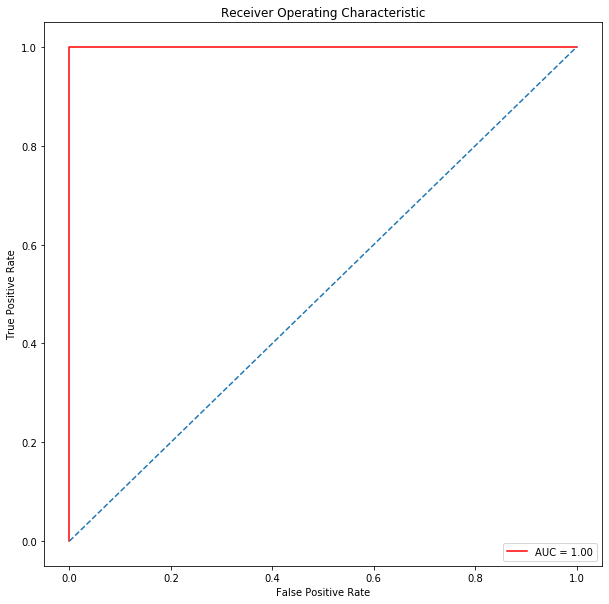

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate3,true_positive_rate3, color='red',label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

GradientBoostingClassifier Model

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
mod4 = GradientBoostingClassifier( n_estimators=100,  learning_rate=0.12, subsample=0.8)
mod4.fit(x_train,y_train)
train_accuracy4=mod4.score(x_train,y_train)
print('train accuracy\t:',train_accuracy4)
test_accuracy4=mod4.score(x_test,y_test)
print('test accurracy\t:',test_accuracy4)

train accuracy	: 1.0
test accurracy	: 1.0


Confusion Matrix And Classification Report

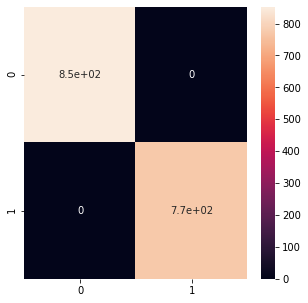

In [0]:
y_pred4=mod4.predict(x_test)
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test,y_pred4)
plt.figure(figsize=(5,5))
sns.heatmap(cm4,annot=True)

In [0]:
from sklearn.metrics import classification_report
target=['edible','poisonous']
print(classification_report(y_test,y_pred4,target_names=target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       852
   poisonous       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Receiver Operating Characteristic

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate4, true_positive_rate4, thresholds4 = roc_curve(y_test, y_pred4)
roc_auc4 = auc(false_positive_rate4, true_positive_rate4)
roc_auc4

1.0

Text(0.5, 0, 'False Positive Rate')

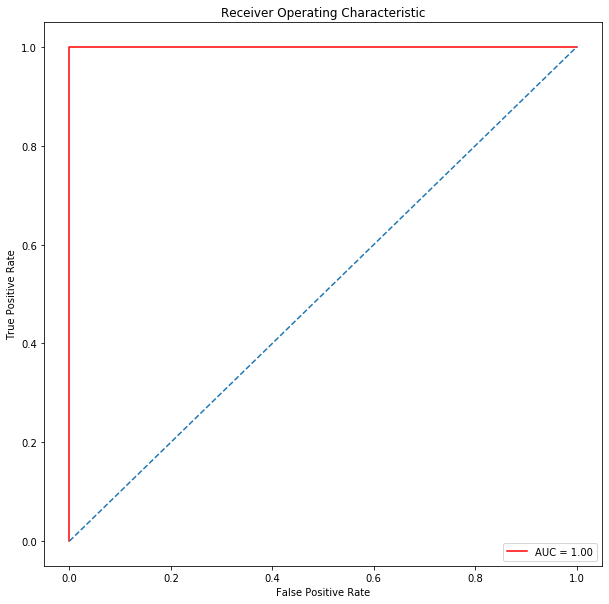

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate4,true_positive_rate4, color='red',label = 'AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

KNeighborsClassifier Model

In [0]:
from sklearn.neighbors import KNeighborsClassifier
mod5=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
mod5.fit(x_train,y_train)
train_accuracy5=mod5.score(x_train,y_train)
print('train accuracy\t:',train_accuracy5)
test_accuracy5=mod5.score(x_test,y_test)
print('test accurracy\t:',test_accuracy5)

train accuracy	: 1.0
test accurracy	: 1.0


Confusion Matrix And Classification Report

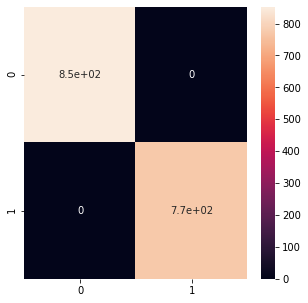

In [0]:
y_pred5=mod5.predict(x_test)
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test,y_pred5)
plt.figure(figsize=(5,5))
sns.heatmap(cm5,annot=True)

In [0]:
from sklearn.metrics import classification_report
target=['edible','poisonous']
print(classification_report(y_test,y_pred5,target_names=target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       852
   poisonous       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Receiver Operating Characteristic

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate5, true_positive_rate5, thresholds5 = roc_curve(y_test, y_pred5)
roc_auc5 = auc(false_positive_rate5, true_positive_rate5)
roc_auc5

1.0

Text(0.5, 0, 'False Positive Rate')

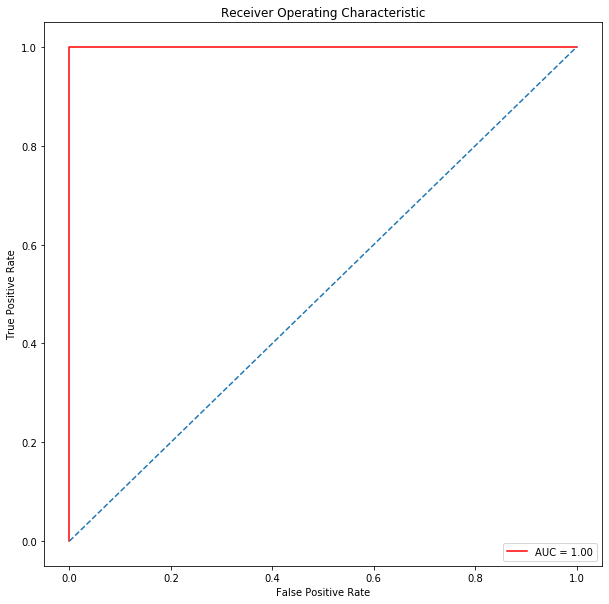

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate5,true_positive_rate5, color='red',label = 'AUC = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

SupportVectorMachine Model

In [0]:
from sklearn.svm import SVC
mod6=SVC(kernel='rbf')
mod6.fit(x_train,y_train)
train_accuracy6=mod6.score(x_train,y_train)
print('train accuracy\t:',train_accuracy6)
test_accuracy6=mod6.score(x_test,y_test)
print('test accurracy\t:',test_accuracy6)

train accuracy	: 1.0
test accurracy	: 1.0


Confusion Matrix And Classification Report

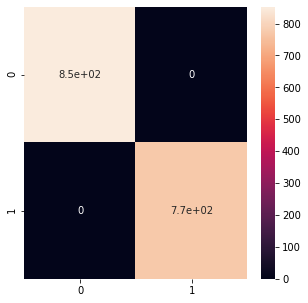

In [0]:
y_pred6=mod6.predict(x_test)
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test,y_pred6)
plt.figure(figsize=(5,5))
sns.heatmap(cm6,annot=True)

In [0]:
from sklearn.metrics import classification_report
target=['edible','poisonous']
print(classification_report(y_test,y_pred6,target_names=target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       852
   poisonous       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Receiver Operating Characteristic

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate6, true_positive_rate6, thresholds6 = roc_curve(y_test, y_pred6)
roc_auc6 = auc(false_positive_rate6, true_positive_rate6)
roc_auc6

1.0

Text(0.5, 0, 'False Positive Rate')

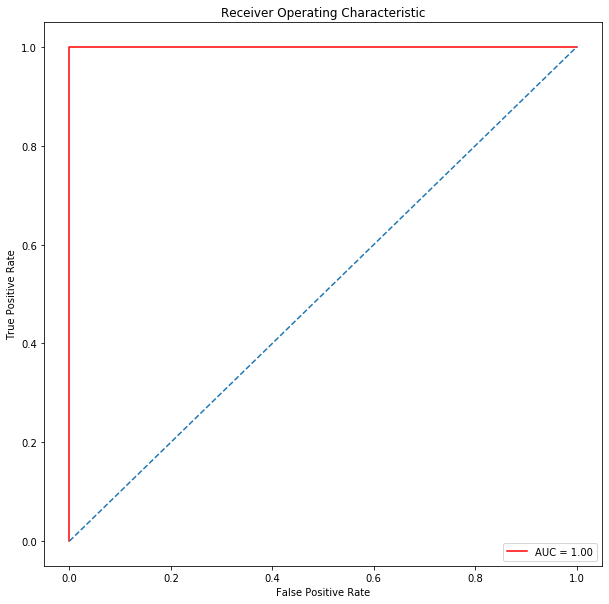

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate6,true_positive_rate6, color='red',label = 'AUC = %0.2f' % roc_auc6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Naive Bayes Model

In [0]:
from sklearn.naive_bayes import GaussianNB
mod7=GaussianNB()
mod7.fit(x_train,y_train)
train_accuracy7=mod7.score(x_train,y_train)
print('train accuracy\t:',train_accuracy7)
test_accuracy7=mod7.score(x_test,y_test)
print('test accurracy\t:',test_accuracy7)

train accuracy	: 0.9222957378058163
test accurracy	: 0.9156923076923077


Confusion Matrix And Classification Report

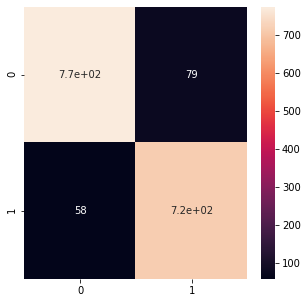

In [0]:
y_pred7=mod7.predict(x_test)
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test,y_pred7)
plt.figure(figsize=(5,5))
sns.heatmap(cm7,annot=True)

In [0]:
from sklearn.metrics import classification_report
target=['edible','poisonous']
print(classification_report(y_test,y_pred7,target_names=target))

              precision    recall  f1-score   support

      edible       0.93      0.91      0.92       852
   poisonous       0.90      0.92      0.91       773

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



Receiver Operating Characteristic

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate7, true_positive_rate7, thresholds7 = roc_curve(y_test, y_pred7)
roc_auc7 = auc(false_positive_rate7, true_positive_rate7)
roc_auc7

0.9161223268893219

Text(0.5, 0, 'False Positive Rate')

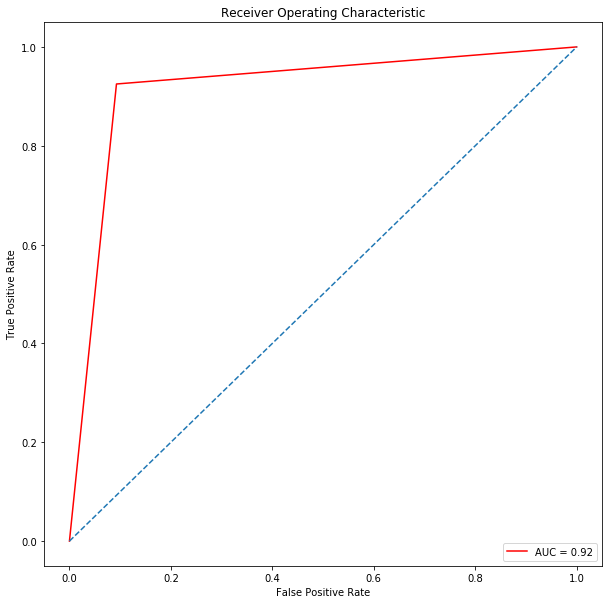

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate7,true_positive_rate7, color='red',label = 'AUC = %0.2f' % roc_auc7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Artificial Neural Networks

In [0]:
from keras.models import Sequential
from keras.layers import Dense
mod8=Sequential()
mod8.add(Dense(64,activation='relu',input_dim=22))
mod8.add(Dense(1,activation='sigmoid'))
mod8.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mod8.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
6499/6499 [==============================] - 1s 147us/step - loss: 0.1874 - acc: 0.9309
Epoch 2/100
6499/6499 [==============================] - 1s 115us/step - loss: 0.0396 - acc: 0.9915
Epoch 3/100
6499/6499 [==============================] - 1s 115us/step - loss: 0.0149 - acc: 0.9991
Epoch 4/100
6499/6499 [==============================] - 1s 113us/step - loss: 0.0074 - acc: 0.9997
Epoch 5/100
6499/6499 [==============================] - 1s 116us/step - loss: 0.0041 - acc: 1.0000
Epoch 6/100
6499/6499 [==============================] - 1s 117us/step - loss: 0.0026 - acc: 1.0000
Epoch 7/100
6499/6499 [==============================] - 1s 120us/step - loss: 0.0016 - acc: 1.0000
Epoch 8/100
6499/6499 [==============================] - 1s 121us/step - loss: 0.0011 - acc: 1.0000
Epoch 9/100
6499/6499 [==============================] - 1s 116us/step - loss: 8.1930e-04 - acc: 1.0000
Epoch 10/100
6499/6499 [==============================] - 1s 119us/step - loss: 5.8075e-04 - acc

Train on 1300 samples, validate on 325 samples
Epoch 1/70
1300/1300 [==============================] - 0s 150us/step - loss: 1.0912e-07 - acc: 1.0000 - val_loss: 1.0963e-07 - val_acc: 1.0000
Epoch 2/70
1300/1300 [==============================] - 0s 143us/step - loss: 1.0912e-07 - acc: 1.0000 - val_loss: 1.0963e-07 - val_acc: 1.0000
Epoch 3/70
1300/1300 [==============================] - 0s 153us/step - loss: 1.0912e-07 - acc: 1.0000 - val_loss: 1.0963e-07 - val_acc: 1.0000
Epoch 4/70
1300/1300 [==============================] - 0s 149us/step - loss: 1.0912e-07 - acc: 1.0000 - val_loss: 1.0963e-07 - val_acc: 1.0000
Epoch 5/70
1300/1300 [==============================] - 0s 159us/step - loss: 1.0912e-07 - acc: 1.0000 - val_loss: 1.0963e-07 - val_acc: 1.0000
Epoch 6/70
1300/1300 [==============================] - 0s 142us/step - loss: 1.0912e-07 - acc: 1.0000 - val_loss: 1.0963e-07 - val_acc: 1.0000
Epoch 7/70
1300/1300 [==============================] - 0s 147us/step - loss: 1.0912e-07 

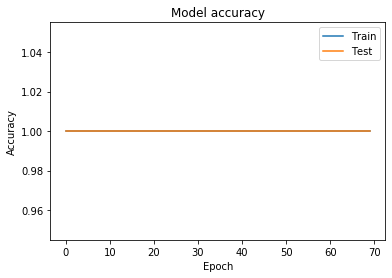

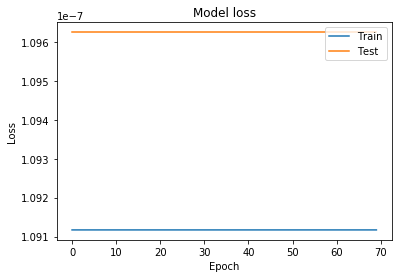

In [0]:
history = mod8.fit(x_test, y_test, validation_split=0.20, epochs=70, batch_size=10, verbose=1)

# Plot training & validation accuracy values

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Model Comaprison

In [0]:
model=['KNN','SVM','Decision Tree','Random Forest','Logistic','Gradient Boosting','Naive Bayes']
training_score=[train_accuracy1,train_accuracy2,train_accuracy3,train_accuracy4,train_accuracy5,train_accuracy6,train_accuracy7]
testing_score=[test_accuracy1,test_accuracy2,test_accuracy3,test_accuracy4,test_accuracy5,test_accuracy6,test_accuracy7]
compar_df=pd.DataFrame(index=model)
compar_df['Training']=training_score
compar_df['Testing']=testing_score
compar_df

,Training,Testing
KNN,0.957070,1.000000
SVM,0.995230,0.996923
Decision Tree,0.997692,0.999385
Random Forest,0.995230,0.996923
Logistic,1.000000,1.000000
Gradient Boosting,1.000000,1.000000
Naive Bayes,0.922296,0.915692


<BarContainer object of 7 artists>

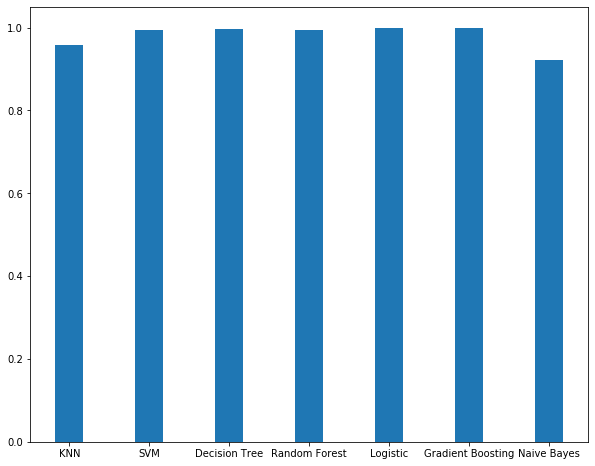

In [0]:
plt.figure(figsize=(10,8))
plt.bar(model,training_score,width=0.35)